In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Genetics Lab Practical S2024
This report analyzes the performance of the Genetics Lab Practical across 5 different sections taught by 3 GAs. The goal is to determine which questions proved most challenging and indicate areas for improvement.
The questions were developed according to a general pattern. This analysis only accounts for MCQs, not FRQs. <br> <br>
Data collection was performed by Rom Yang

In [2]:
#files = ["section_1.txt","section_2.txt","section_3.txt","section_4.txt","section_5.txt"]
directory = "/home/shoshin/Desktop/Code/scantron/"
text_files = [f for f in os.listdir(directory) if f.endswith('.txt')]

# Open a file in read mode
with open(f'{directory}/key/key.txt', 'r') as file:
    for line in file:
        key = line.strip() 
        
dataframes = {}
logic_matrix = {}
q_header = ["Q"+str(n) for n in range(1,31)]

for file in text_files:
    file_path = os.path.join(directory, file)
    df_name = file.split('.')[0]  # Use filename without extension as DataFrame name
    #print(df_name)
    dataframes[df_name] = pd.read_csv(file_path, delimiter=' ',header=0, names=q_header,index_col=False)
    # Create a table that compares the key to every record
    logic_matrix[df_name] = dataframes[df_name] == dict(zip(q_header,key.split()))

In [3]:
dataframes['section_1'].head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30
0,B,E,C,AC,C,D,ABE,D,ACD,AB,...,B,E,C,B,C,A,A,A,A,CD
1,B,A,D,ACD,C,C,BCE,D,ACD,AB,...,B,E,C,B,C,A,D,C,E,CD
2,B,A,D,ACD,C,B,BDE,E,AC,AB,...,A,E,C,B,C,A,B,C,C,CD
3,B,A,D,AD,C,C,AB,E,AC,ACD,...,B,E,C,A,C,D,A,C,E,CD
4,B,E,D,DE,C,NaN,ABE,B,AD,BD,...,B,E,C,E,A,D,B,C,D,CD


In [4]:
logic_matrix['section_1'].head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30
0,True,False,False,False,True,False,False,True,True,True,...,False,True,True,True,True,True,False,False,False,True
1,True,True,True,True,True,False,True,True,True,True,...,False,True,True,True,True,True,True,True,False,True
2,True,True,True,True,True,True,False,False,False,True,...,True,True,True,True,True,True,False,True,True,True
3,True,True,True,False,True,False,False,False,False,False,...,False,True,True,False,True,False,False,True,False,True
4,True,False,True,False,True,False,False,False,False,False,...,False,True,True,False,False,False,False,True,False,True


The logic matrix is used to sum the total number of correct answers per question.

In [5]:
results = {}
for section, data in logic_matrix.items():
    results[section]= data.sum(axis=0)

# Create a new dictionary with keys sorted alphabetically
ordered_results = {key: results[key] for key in sorted(results)}

section_results = pd.DataFrame(ordered_results)

In [6]:
section_results.head()

,section_1,section_2,section_3,section_4,section_5
Q1,19,15,18,21,18
Q2,18,17,16,16,15
Q3,16,18,18,13,13
Q4,15,11,14,9,12
Q5,20,18,19,18,17


The heatmap below indicates the most confident answers in green and the least confident in red. Students across all sections failed to answer questions regarding labs 7 and 8, namely RNA isolation and Western Blot part 1. Question 29 is also a unique difficulty for students with at most 10 students answering correctly from section 5.

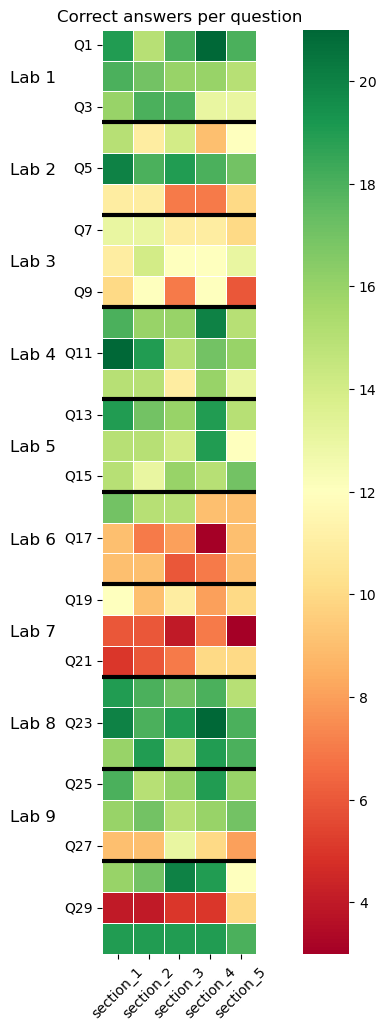

In [7]:
sns.heatmap(section_results,square=True,linewidths=0.5,cmap="RdYlGn")
# Annotate horizontal lines every 3 squares
for i in range(3, section_results.shape[0], 3):
    plt.axhline(i, color='black', linewidth=3)
    plt.text(-3,i-1.3,f'Lab {i//3}',fontsize='large')
plt.gcf().set_size_inches(12,12)
plt.title("Correct answers per question")
plt.xticks(rotation=45)
#plt.savefig('long_heatmap.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [8]:
questions_aa = section_results.iloc[:27:3]
questions_jk = section_results.iloc[1:27:3]
questions_ry = section_results.iloc[2:27:3]

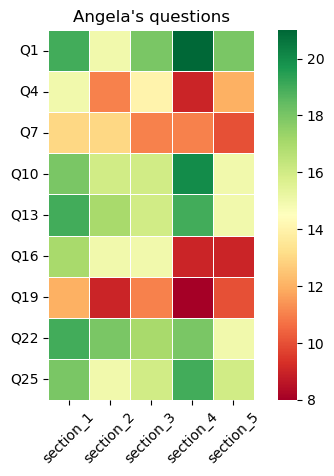

In [9]:
sns.heatmap(questions_aa,square=True,linewidths=0.5,cmap="RdYlGn")
plt.title("Angela's questions")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
#plt.savefig('aa_heatmap.jpg', dpi=300, bbox_inches='tight')
plt.show()

Angela's questions are well balanced in difficulty, as seen by the neutral spread, with a hot spike in Lab 7

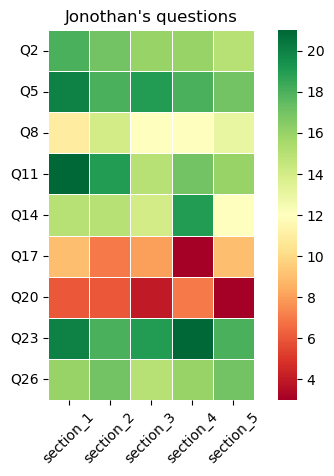

In [10]:
sns.heatmap(questions_jk,square=True,linewidths=0.5,cmap="RdYlGn")
plt.title("Jonothan's questions")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
#plt.savefig('jk_heatmap.jpg', dpi=300, bbox_inches='tight')
plt.show()

Jonothan's questions are generally easy, up until Lab 7 & 8

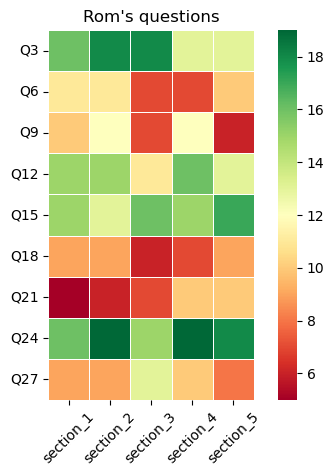

In [11]:
sns.heatmap(questions_ry,square=True,linewidths=0.5,cmap="RdYlGn")
plt.title("Rom's questions")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
#plt.savefig('ry_heatmap.jpg', dpi=300, bbox_inches='tight')
plt.show()

Rom's questions got a lot of people thinking about their career choices

In [12]:
section_results.mean(axis=1)

Q1     18.2
Q2     16.4
Q3     15.6
Q4     12.2
Q5     18.4
Q6      9.2
Q7     11.6
Q8     12.4
Q9      9.4
Q10    17.0
Q11    17.6
Q12    14.0
Q13    17.2
Q14    15.0
Q15    15.2
Q16    13.0
Q17     7.2
Q18     8.0
Q19    10.0
Q20     5.2
Q21     7.6
Q22    17.4
Q23    19.2
Q24    17.4
Q25    16.8
Q26    16.2
Q27     9.8
Q28    16.8
Q29     5.6
Q30    18.8
dtype: float64

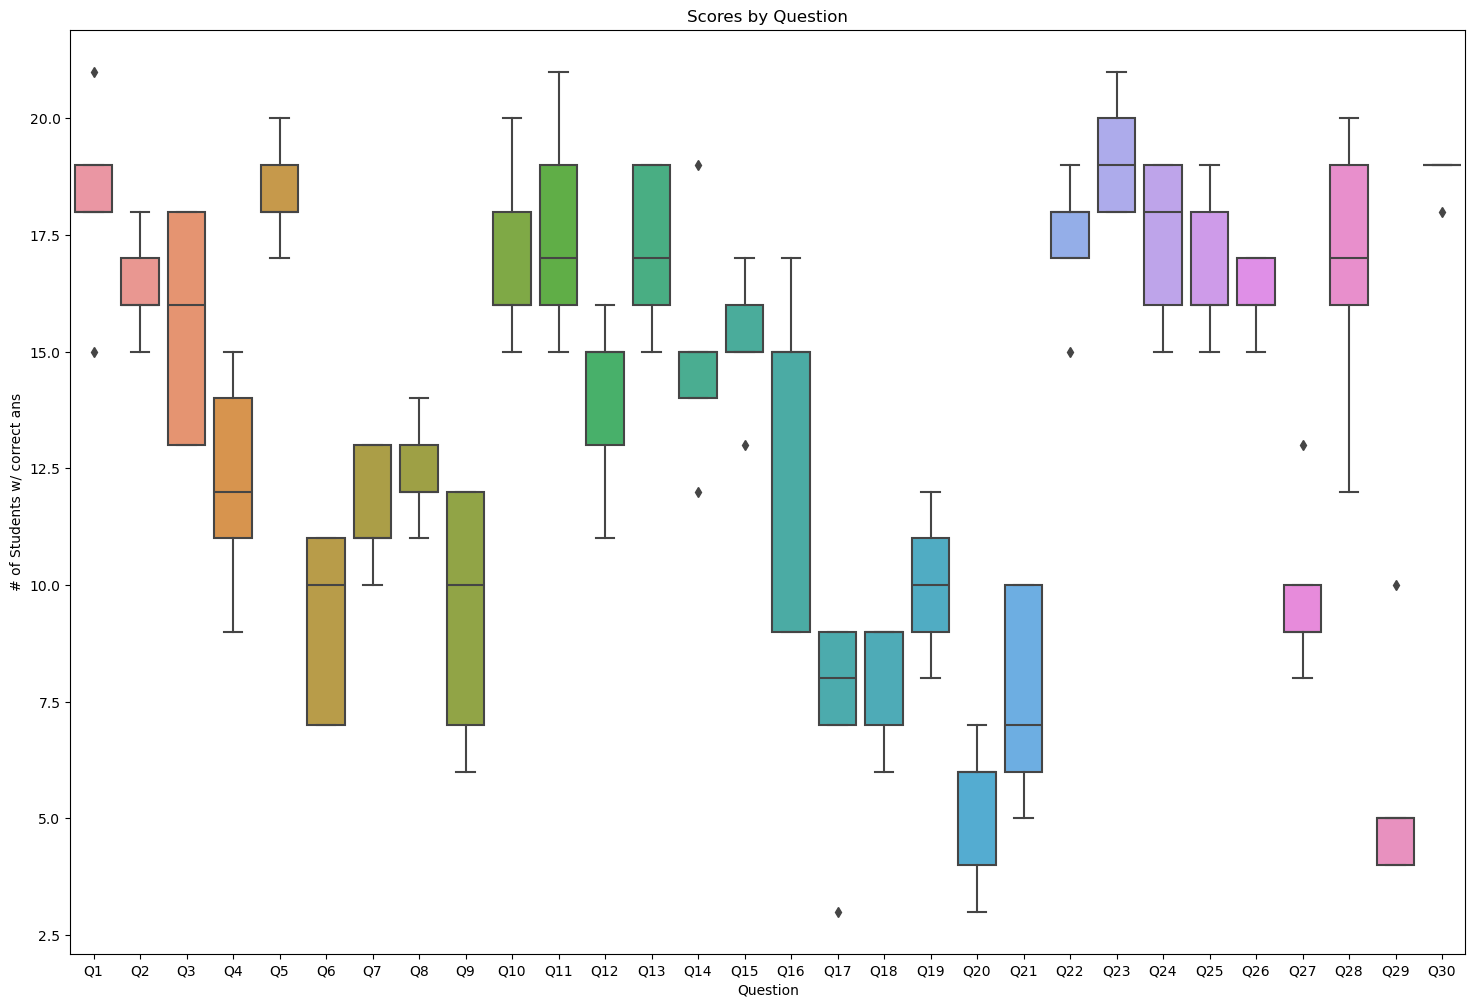

In [13]:
sns.boxplot(section_results.transpose())

plt.title('Scores by Question')
plt.xlabel('Question')
plt.ylabel('# of Students w/ correct ans')
plt.gcf().set_size_inches(18,12)
#plt.savefig('avg_correct_boxplots.jpg', dpi=300, bbox_inches='tight')
plt.show()